In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy import stats, interpolate
import matplotlib.dates as mdates

filepath = 'HOT_Bottle_ALOHA.csv'

aloha = pd.read_csv(filepath, usecols=['time','depth','ph_bottle_hot','SiO4_bottle_hot','psi_bottle_hot'], parse_dates=['time'])


In [2]:
# QUESTIONS
# month or 3 kmonth
# twinax legend?

aloha.set_index('time', inplace=True)
aloha

# https://www.includehelp.com/python/how-to-set-column-as-date-index.aspx

,ph_bottle_hot,SiO4_bottle_hot,psi_bottle_hot,depth
time,,,,
1988-10-31 00:00:00+00:00,NaN,0.91,NaN,4.7
1988-10-31 00:00:00+00:00,NaN,1.11,NaN,39.4
1988-10-31 00:00:00+00:00,NaN,1.50,NaN,99.4
1988-10-31 00:00:00+00:00,NaN,2.10,NaN,150.3
1988-10-31 00:00:00+00:00,NaN,2.89,NaN,191.8
...,...,...,...,...
2020-12-20 00:00:00+00:00,NaN,NaN,NaN,999.9
2020-12-20 00:00:00+00:00,NaN,NaN,NaN,728.7
2020-12-20 00:00:00+00:00,NaN,NaN,NaN,435.5


In [3]:
# Subset data for surface ocean only 
aloha_100 = aloha[(aloha.depth <100)]
aloha_200 = aloha[(aloha.depth <200)]

# Average data by day
aloha_avg_100 = aloha_100.groupby('time').mean(numeric_only=True)
aloha_avg_200 = aloha_200.groupby('time').mean(numeric_only=True)







In [4]:
# Drop NaN values from dataset and separate each variable
# Add daily values to
gap_ph_100 = aloha_avg_100['ph_bottle_hot'].dropna()
gap_sio4_100 = aloha_avg_100['SiO4_bottle_hot'].dropna()
gap_psi_100 = aloha_avg_100['psi_bottle_hot'].dropna()



# Create variables for plot
x_ph_gap_100 = gap_ph_100.index.values
y_ph_gap_100 = gap_ph_100.values
x_sio4_gap_100 = gap_sio4_100.index.values
y_sio4_gap_100 = gap_sio4_100.values
x_psi_gap_100 = gap_psi_100.index.values
y_psi_gap_100 = gap_psi_100.values



gap_ph_100

time
1992-06-08 00:00:00+00:00    8.099500
1992-06-09 00:00:00+00:00    8.086400
1992-07-03 00:00:00+00:00    8.104000
1992-07-04 00:00:00+00:00    8.098000
1992-07-05 00:00:00+00:00    8.095750
                               ...   
2020-11-20 00:00:00+00:00    8.074500
2020-11-21 00:00:00+00:00    8.074000
2020-12-17 00:00:00+00:00    8.075333
2020-12-19 00:00:00+00:00    8.064000
2020-12-20 00:00:00+00:00    8.069000
Name: ph_bottle_hot, Length: 506, dtype: float64

In [5]:
# Find rolling monthly mean dataset
monthly1_ph_100 = aloha_avg_100['ph_bottle_hot'].rolling(window=30, min_periods=3, center=True).mean()
monthly1_sio4_100 = aloha_avg_100['SiO4_bottle_hot'].rolling(window=30, min_periods=3, center=True).mean()
monthly1_psi_100 = aloha_avg_100['psi_bottle_hot'].rolling(window=30, min_periods=3, center=True).mean()


# Create variables for plot
x_ph_monthly1_100 = monthly1_ph_100.index
y_ph_monthly1_100 = monthly1_ph_100.values
x_sio4_monthly1_100 = monthly1_sio4_100.index
y_sio4_monthly1_100 = monthly1_sio4_100.values
x_psi_monthly1_100 = monthly1_psi_100.index
y_psi_monthly1_100 = monthly1_psi_100.values

aloha


,ph_bottle_hot,SiO4_bottle_hot,psi_bottle_hot,depth
time,,,,
1988-10-31 00:00:00+00:00,NaN,0.91,NaN,4.7
1988-10-31 00:00:00+00:00,NaN,1.11,NaN,39.4
1988-10-31 00:00:00+00:00,NaN,1.50,NaN,99.4
1988-10-31 00:00:00+00:00,NaN,2.10,NaN,150.3
1988-10-31 00:00:00+00:00,NaN,2.89,NaN,191.8
...,...,...,...,...
2020-12-20 00:00:00+00:00,NaN,NaN,NaN,999.9
2020-12-20 00:00:00+00:00,NaN,NaN,NaN,728.7
2020-12-20 00:00:00+00:00,NaN,NaN,NaN,435.5


In [6]:
# Find rolling 3 monthly mean dataset
monthly3_ph_100 = aloha_avg_100['ph_bottle_hot'].rolling(window=90, min_periods=9, center=True).mean()
monthly3_sio4_100 = aloha_avg_100['SiO4_bottle_hot'].rolling(window=90, min_periods=9, center=True).mean()
monthly3_psi_100 = aloha_avg_100['psi_bottle_hot'].rolling(window=90, min_periods=9, center=True).mean()


# Create variables for plot
x_ph_monthly3_100 = monthly3_ph_100.index
y_ph_monthly3_100 = monthly3_ph_100.values
x_sio4_monthly3_100 = monthly3_sio4_100.index
y_sio4_monthly3_100 = monthly3_sio4_100.values
x_psi_monthly3_100 = monthly3_psi_100.index
y_psi_monthly3_100 = monthly3_psi_100.values



In [7]:
# # Find rolling 6 monthly mean dataset
# monthly6_ph_100 = aloha_avg_100['ph_bottle_hot'].rolling(window=180, min_periods=18, center=True).mean()
# monthly6_sio4_100 = aloha_avg_100['SiO4_bottle_hot'].rolling(window=180, min_periods=18, center=True).mean()
# monthly6_psi_100 = aloha_avg_100['psi_bottle_hot'].rolling(window=180, min_periods=18, center=True).mean()


# # Create variables for plot
# x_ph_monthly6_100 = monthly6_ph_100.index
# y_ph_monthly6_100 = monthly6_ph_100.values
# x_sio4_monthly6_100 = monthly6_sio4_100.index
# y_sio4_monthly6_100 = monthly6_sio4_100.values
# x_psi_monthly6_100 = monthly6_psi_100.index
# y_psi_monthly6_100 = monthly6_psi_100.values



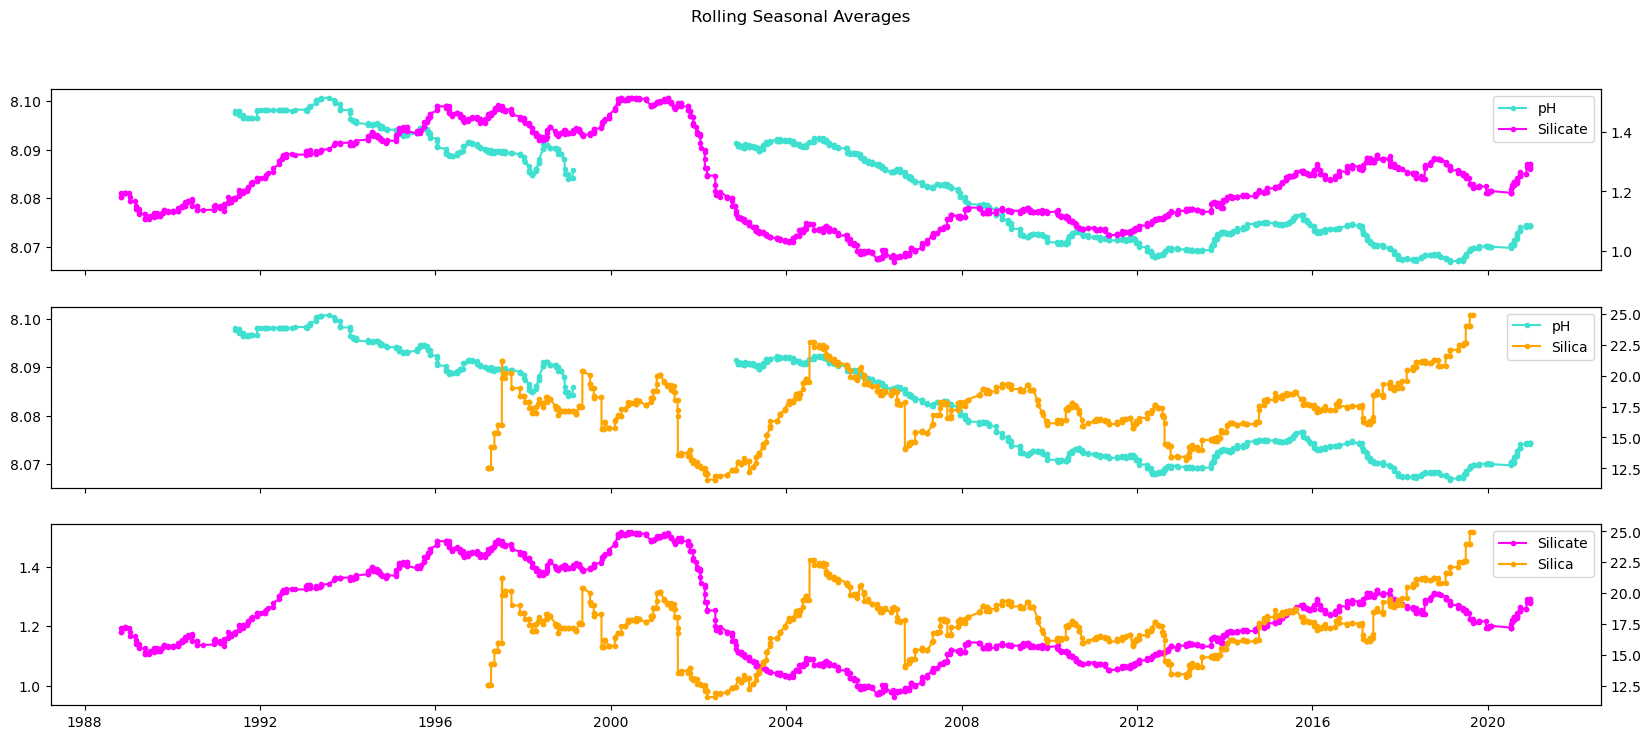

In [8]:
# Plot Rolling Monthly Average shared plots
fig, axs = plt.subplots(figsize=(20,8), nrows=3, sharex=True)
plt.suptitle("Rolling Seasonal Averages")

# pH and Silicate
# Plot pH
ph_0 = axs[0].plot(x_ph_monthly3_100, y_ph_monthly3_100, marker='.', c='turquoise', label='pH')
# Plot Silicate
twinx0 = axs[0].twinx()
sio4_0 = twinx0.plot(x_sio4_monthly3_100, y_sio4_monthly3_100, marker='.', c='magenta', label='Silicate')
axs[0].legend()
# Share legend: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines = ph_0 + sio4_0
labels = [l.get_label() for l in lines]
axs[0].legend(lines, labels, loc=0)


# pH and Silica
# Plot pH
ph_1 = axs[1].plot(x_ph_monthly3_100, y_ph_monthly3_100, marker='.', c='turquoise', label='pH')
# Plot Silica
twinx1 = axs[1].twinx()
psi_1 = twinx1.plot(x_psi_monthly3_100, y_psi_monthly3_100, marker='.', c='orange', label='Silica')
axs[1].legend()
# Share legend
lines = ph_1 + psi_1
labels = [l.get_label() for l in lines]
axs[1].legend(lines, labels, loc=0)

# Silicate and Silica
# Plot silicate
sio4_2 = axs[2].plot(x_sio4_monthly3_100, y_sio4_monthly3_100, marker='.', c='magenta', label='Silicate')
# Plot Silica
twinx2 = axs[2].twinx()
psi_2 = twinx2.plot(x_psi_monthly3_100, y_psi_monthly3_100, marker='.', c='orange', label='Silica')
axs[2].legend()
# Share legend
lines = sio4_2 + psi_2
labels = [l.get_label() for l in lines]
axs[2].legend(lines, labels, loc=0)



# titles 
# x and y labels
# font sizes



In [9]:
## hw4: epth_inds = np.where(df['Depth'].notnull())
#missing_ph = np.where(monthly3_100['

NameError: name 'x_ph_monthly3_200' is not defined

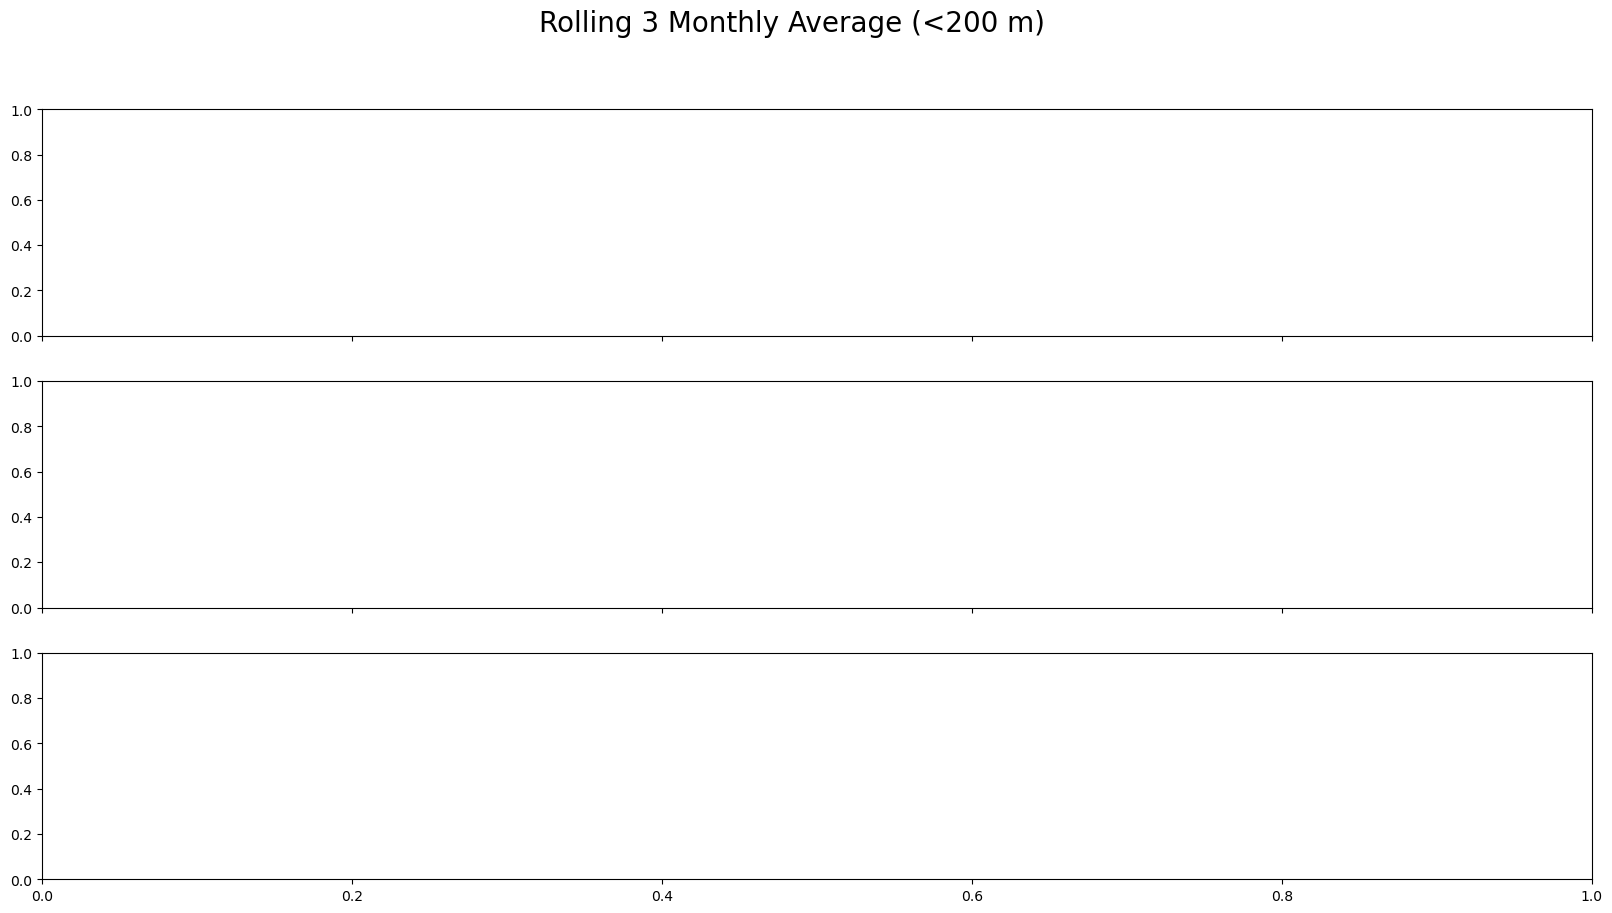

In [10]:
# Plot Rolling Monthly 3 Average separate plots: pH, Silicate and Silica 
fig, axs = plt.subplots(figsize=(20,10), nrows=3, sharex=True)
plt.suptitle('Rolling 3 Monthly Average (<200 m)', fontsize=20)

# Plot pH
axs[0].plot(x_ph_monthly3_200, y_ph_monthly3_200, marker='.', c='turquoise', label='Rolling 3 Monthly Average pH (<200 m)')
axs[0].legend()
axs[0].set_ylabel('pH')
axs[0].set_title('pH')

# Plot Silicate
axs[1].plot(x_sio4_monthly3_200, y_sio4_monthly3_200, marker='.', c='magenta', label='Rolling 3 Monthly Average Silicate (<200 m)')
axs[1].legend()
axs[1].set_ylabel('Silicate (nmol/kg)')
axs[1].set_title('Silicate')

# Plot Silica
axs[2].plot(x_psi_monthly3_200, y_psi_monthly3_200, marker='.', c='green', label='Rolling 3 Monthly Average Particulate Silica (<200 m)')
axs[2].legend()
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Particulate Silica (nmol/kg)')
axs[2].set_title('Particulate Silica')

In [ ]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

#pH

# Daily Average 
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_ph_gap_100, y_ph_gap_100, marker='.', c='blue', label='Daily Average pH (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('pH')
axs.set_title('Daily Average pH (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_ph_gap_200, y_ph_gap_200, marker='.', c='blue', label='Daily Average pH (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('pH')
axs.set_title('Daily Average pH (<200 m)')

# Rolling Monthly Average 
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_ph_monthly1_100, y_ph_monthly1_100, marker='.', c='orange', label='Rolling Monthly Average pH (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('pH')
axs.set_title('Rolling Monthly Average pH (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_ph_monthly1_200, y_ph_monthly1_200, marker='.', c='orange', label='Rolling Monthly Average pH (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('pH')
axs.set_title('Rolling Monthly Average pH (<200 m)')

# Rolling 3 Monthly Average 
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_ph_monthly3_100, y_ph_monthly3_100, marker='.', c='turquoise', label='Rolling 3 Monthly Average pH (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('pH')
axs.set_title('Rolling 3 Monthly Average pH (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_ph_monthly3_200, y_ph_monthly3_200, marker='.', c='turquoise', label='Rolling 3 Monthly Average pH (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('pH')
axs.set_title('Rolling 3 Monthly Average pH (<200 m)')

# Rolling 6 Monthly Average 
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_ph_monthly6_100, y_ph_monthly6_100, marker='.', c='magenta', label='Rolling 6 Monthly Average pH (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('pH')
axs.set_title('Rolling 6 Monthly Average pH (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_ph_monthly6_200, y_ph_monthly6_200, marker='.', c='magenta', label='Rolling 6 Monthly Average pH (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('pH')
axs.set_title('Rolling 6 Monthly Average pH (<200 m)')

In [ ]:
# Silicate

# Daily Average
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_sio4_gap_100, y_sio4_gap_100, marker='.', c='blue', label='Silicate (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_title('Average Silicate (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_sio4_gap_200, y_sio4_gap_200, marker='.', c='blue', label='Silicate (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_title('Average Silicate (<200 m)')


# Rolling Monthly Average
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_sio4_monthly1_100, y_sio4_monthly1_100, marker='.', c='orange', label='Rolling Monthly Average Silicate (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_title('Rolling Monthly Average Silicate (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_sio4_monthly1_200, y_sio4_monthly1_200, marker='.', c='orange', label='Rolling Monthly Average Silicate (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_title('Rolling Monthly Average Silicate (<200 m)')


# Rolling 3 Monthly Average
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_sio4_monthly3_100, y_sio4_monthly3_100, marker='.', c='turquoise', label='Rolling 3 Monthly Average Silicate (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_title('Rolling 3 Monthly Average Silicate (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_sio4_monthly3_200, y_sio4_monthly3_200, marker='.', c='turquoise', label='Rolling 3 Monthly Average Silicate (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_title('Rolling 3 Monthly Average Silicate (<200 m)')


# Rolling 6 Monthly Average
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_sio4_monthly6_100, y_sio4_monthly6_100, marker='.', c='magenta', label='Rolling 6 Monthly Average Silicate (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_title('Rolling 6 Monthly Average Silicate (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_sio4_monthly6_200, y_sio4_monthly6_200, marker='.', c='magenta', label='Rolling 6 Monthly Average Silicate (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_title('Rolling 6 Monthly Average Silicate (<200 m)')

In [ ]:
# Particulate Silica

# Daily Average 
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_psi_gap_100, y_psi_gap_100, marker='.', c='blue', label='Daily Particulate Silica (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Particulate Silica (nmol/kg)')
axs.set_title('Daily Average Particulate Silica (<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_psi_gap_200, y_psi_gap_200, marker='.', c='blue', label='Particulate Silica (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Particulate Silica (nmol/kg)')
axs.set_title('Average Particulate Silica (<200 m)')


# Monthly Rolling Average 
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_psi_monthly1_100, y_psi_monthly1_100, marker='.', c='orange', label='Rolling Monthly Average Particulate Silica (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Particulate Silica (nmol/kg)')
axs.set_title('Rolling Monthly Average Particulate Silica(<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_psi_monthly1_200, y_psi_monthly1_200, marker='.', c='orange', label='Rolling Monthly Average Particulate Silica (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Particulate Silica (nmol/kg)')
axs.set_title('Rolling Monthly Average Particulate Silica(<200 m)')


# Rolling 3 Monthly Average 
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_psi_monthly3_100, y_psi_monthly3_100, marker='.', c='turquoise', label='Rolling 3 Monthly Average Particulate Silica (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Particulate Silica (nmol/kg)')
axs.set_title('Rolling 3 Monthly Average Particulate Silica(<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_psi_monthly3_200, y_psi_monthly3_200, marker='.', c='turquoise', label='Rolling 3 Monthly Average Particulate Silica (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Particulate Silica (nmol/kg)')
axs.set_title('Rolling 3 Monthly Average Particulate Silica (<200 m)')


# Rolling 6 Monthly Average 
fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_psi_monthly6_100, y_psi_monthly6_100, marker='.', c='magenta', label='Rolling 6 Monthly Average Particulate Silica (<100 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Particulate Silica (nmol/kg)')
axs.set_title('Rolling 6 Monthly Average Particulate Silica(<100 m)')

fig, axs = plt.subplots(figsize=(16,5))
axs.plot(x_psi_monthly6_200, y_psi_monthly6_200, marker='.', c='magenta', label='Rolling 6 Monthly Average Particulate Silica (<200 m)')
axs.legend()
axs.set_xlabel('Time')
axs.set_ylabel('Particulate Silica (nmol/kg)')
axs.set_title('Rolling 6 Monthly Average Particulate Silica(<200 m)')

In [ ]:
#STATS

# r_sio4 = aloha_100['ph_bottle_hot'].corr(aloha_100['SiO4_bottle_hot'])
# r_psi = aloha_100['ph_bottle_hot'].corr(aloha_100['psi_bottle_hot'])

# print('The r^2 value of silicate is:', r_sio4**2)
# print('The r^2 value of silica is:', r_psi**2)

#slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y)



In [ ]:
# ANNUAL DATA - NOT ENOUGH RESOLUTION 

# aloha_100_year = aloha_100.groupby(aloha_100.index.year).mean(numeric_only=True)
# aloha_200_year = aloha_200.groupby(aloha_200.index.year).mean(numeric_only=True)

# aloha_100_year_ph = aloha_100_year['ph_bottle_hot'].dropna()
# aloha_200_year_ph = aloha_200_year['ph_bottle_hot'].dropna()

# aloha_100_year_sio4 = aloha_100_year['SiO4_bottle_hot'].dropna()
# aloha_200_year_sio4 = aloha_200_year['SiO4_bottle_hot'].dropna()

# aloha_100_year_psi = aloha_100_year['psi_bottle_hot'].dropna()
# aloha_200_year_psi = aloha_200_year['psi_bottle_hot'].dropna()

# fig, axs = plt.subplots(figsize=(20,10), nrows=3, sharex=True)
# axs[0].plot(aloha_200_year_ph.index.values, aloha_200_year_ph.values)
# axs[1].plot(aloha_200_year_sio4.index.values, aloha_200_year_sio4.values)
# axs[2].plot(aloha_200_year_psi.index.values, aloha_200_year_psi.values)


In [ ]:
# # https://sparkbyexamples.com/pandas/pandas-convert-datetime-to-string-format/\
# # https://medium.com/geekculture/how-do-you-use-slice-method-in-the-pandas-dataframe-on-string-data-type-columns-6a8fd02c15eb#:~:text=slice()%20method%20in%20Pandas,(start%2C%20stop)%20method.

# #get one column with just year and month
# #establish depth intervals
# # 0, 10, 50, 100, 500, 1000, 2000, 4000
# #make other column rounding number to partic

# #1. turn time into a string 
# aloha['date'] = aloha['time'].astype(str)
# # make date string pretty - slice just year month
# aloha['month'] = aloha['date'].str.slice(0,7)
# #why isn't drop working???
# #aloha.drop(['datestr','datetimestr','monthday'], axis='columns')

# #find unique values by month
# months = np.unique(aloha['month'].values)



# # #make new columns for depth intervals
# depth_intvl = []
# # round each value down to nearest 0, 10, 50, 100, 1000, 2000, 4000

# for x in aloha['depth']:
#     if x >= 200:
#         x = 200
#         depth_intvl.append(x)
#     elif x >= 175:
#         x = 175
#         depth_intvl.append(x)
#     elif x >= 150:
#         x = 150
#         depth_intvl.append(x)
#     elif x >= 125:
#         x = 125
#         depth_intvl.append(x)
#     elif x >= 100:
#         x = 100
#         depth_intvl.append(x)
#     elif x >= 75:
#         x = 75
#         depth_intvl.append(x)
#     elif x >= 50:
#         x = 50
#         depth_intvl.append(x)
#     elif x >= 40:
#         x = 40
#         depth_intvl.append(x)
#     elif x >= 30:
#         x = 30
#         depth_intvl.append(x)
#     elif x >= 20:
#         x = 20
#         depth_intvl.append(x)
#     elif x >= 10:
#         x = 10
#         depth_intvl.append(x)
#     else:
#         x = 0
#         depth_intvl.append(x)
        
# #nearest function instead of >=???  

# aloha['depth_intvl'] = depth_intvl

# # groupby?
# aloha_avg = aloha.groupby(['month','depth_intvl']).mean(numeric_only=True)
# aloha_avg

        






In [ ]:
# time, depth, ph_bottle_hot, dic_bottle_hot, alk_bottle_hot, SiO4_bottle_hot, psi_bottle_hot

In [ ]:
# aloha_avg = aloha_avg.reset_index()

In [ ]:
# display(aloha_avg)

In [ ]:
# ChatGPT helped me deal with the two indexes - URL to conversation below:
# https://chat.openai.com/share/4302f2ea-c3d0-4ba6-882b-da89756aaf5c

#use datetime column for x so ticks aren't weird?
#depth, ph_bottle_hot, dic_bottle_hot, alk_bottle_hot, SiO4_bottle_hot, psi_bottle_hot

# fig,axs = plt.subplots(figsize=(10,6))
# x = aloha_avg[]
# y = aloha_avg.index[1]
# plt.plot(x, y)
# display(aloha_avg.index)

# aloha_avg.set_index(['month', 'depth_intvl'], inplace=True)
# print(aloha_avg.index.names)
# x = aloha_avg['month']
# y = aloha_avg['depth_intvl']
# plt.scatter(x,y, marker='.', c=aloha_avg['ph_bottle_hot'])
 
# x = aloha_avg['month']
# y = aloha_avg['depth']
# plt.scatter(x, y, marker='.', c=aloha_avg['ph_bottle_hot'])






In [ ]:
# aloha_ph = []
# #for loop to go thru each

# for x in aloha['ph_bottle_hot']:
#     if x == Nan:
#         #append alopha_ph with

In [ ]:
# # Find non-Nan values for plotting after pH gap

# ph_inds = np.where(aloha['ph_season_avg'].notnull())
# sio4_inds = np.where(aloha['sio4_season_avg'].notnull())
# psi_inds = np.where(aloha['psi_season_avg'].notnull())
# display(ph_inds)
# display(sio4_inds)
# display(psi_inds)

# ph_nan = np.where(np.isnan(season_ph[]))
# ph_inds = np.where(season_ph.notnull())
# display(ph_nan)
# display(ph_inds)

# Examples from other work
# df['InsertedDate'].dt.year
### df.loc[df['Year']>2007]

## https://sparkbyexamples.com/pandas/pandas-extract-year-from-datetime/?expand_article=1
# # Add year column to seasonal pH 
# # season_ph['year'] = season_ph[season_ph.index.values].dt.year
# # season_ph
# time = season_ph.index.values
# # time.dt.year
# time.type
# aloha_avg_100['year'] = aloha_avg_100[aloha_avg_100.index.values].dt.year

# ph_2000 = season_ph[season_ph.index.year.isin([2000,2020])]
# ph_2000

